This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and structure index.

- $\rho$ vs $SI$

- $X$ vs $SI$

In [1]:
from astropy.table import Table, join
from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# My progs
from CorrTest import R2OCorrTest

In [2]:
# Radio-to-optical offset
r2o= Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# LQAC5-catalog
si_x = Table.read("../data/si_x_0527.fits")

# Cross-match
r2o_si = join(r2o, si_x, keys="iers_name")

# With SI measurements among 2014-2016
mask = (r2o_si["epo_c2015"] != 0)
r2o_si15 = r2o_si[mask]

print("Find structure index for {:d} sources, "
      "and  SI measurement among 2014-2016 for {} sources.".format(len(r2o_si), len(r2o_si15)))

Find structure index for 378 sources, and  SI measurement among 2014-2016 for 172 sources.


# 1. Overall distribution

In [3]:
# MI index at B-band
r2o_si.keep_columns(["ang_sep_sx_1", "nor_sep_sx_1",
                     "ang_sep_k_1", "nor_sep_k_1",
                     "ang_sep_ka_1", "nor_sep_ka_1",
                     "si_med", "epo_med"])
r2o_si15.keep_columns(["ang_sep_sx_1", "nor_sep_sx_1",
                       "ang_sep_k_1", "nor_sep_k_1",
                       "ang_sep_ka_1", "nor_sep_ka_1",
                       "si_c2015", "epo_c2015"])

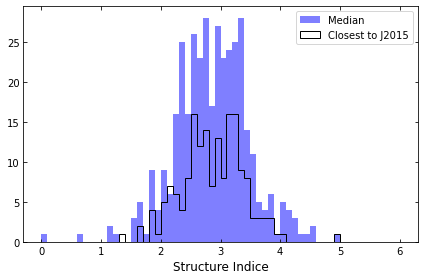

In [4]:
fig, ax = plt.subplots()

bins = np.arange(0, 6.1, 0.1)

ax.hist(r2o_si["si_med"], bins=bins, histtype="stepfilled",
        color="b", alpha=0.5, label="Median")
ax.hist(r2o_si15["si_c2015"], bins=bins, histtype="step", color="k", label="Closest to J2015")
ax.set_xlabel("Structure Indice", fontsize=12)

ax.legend()

plt.tight_layout()

Angular separation vs. SI (Left: Median; Right: J2015)


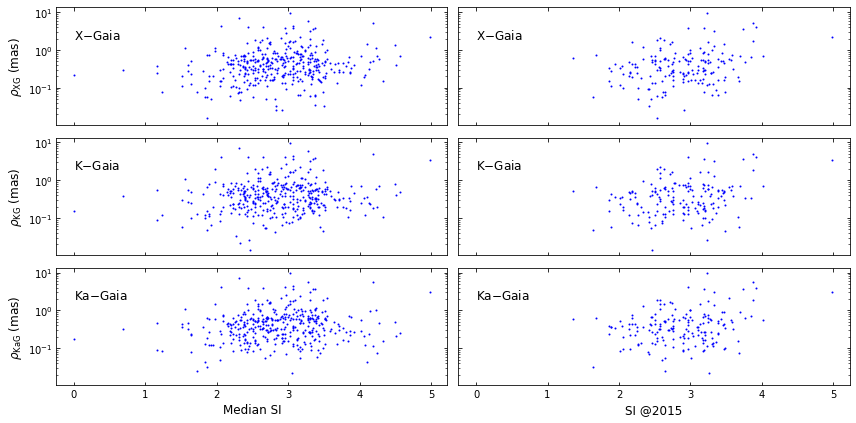

In [5]:
print("Angular separation vs. SI (Left: Median; Right: J2015)")

# Distribution of angular separation
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(figsize=(12, 6),
                                                         nrows=3, ncols=2,
                                                         sharex=True, sharey=True)

ax0.plot(r2o_si["si_med"], r2o_si["ang_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_si15["si_c2015"], r2o_si15["ang_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_si["si_med"], r2o_si["ang_sep_k_1"], "b.", ms=2)
ax3.plot(r2o_si15["si_c2015"], r2o_si15["ang_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_si["si_med"], r2o_si["ang_sep_ka_1"], "b.", ms=2)
ax5.plot(r2o_si15["si_c2015"], r2o_si15["ang_sep_ka_1"], "b.", ms=2)

# ymin, ymax = 0.01, 20
# ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax4.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax4.set_xlabel("Median SI", fontsize=12)
ax5.set_xlabel("SI @2015", fontsize=12)

posx, posy = 0, 2
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "K$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax5.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

Normalized separation vs. MI-B


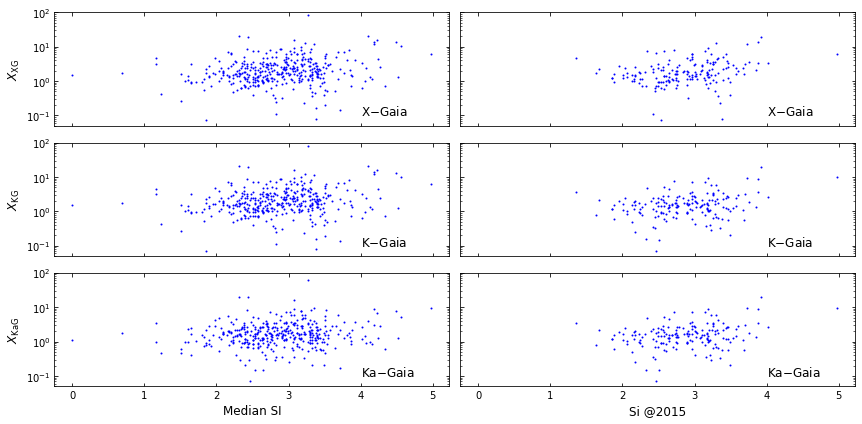

In [6]:
print("Normalized separation vs. MI-B")

# Distribution of angular separation
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(figsize=(12, 6),
                                                         nrows=3, ncols=2,
                                                         sharex=True, sharey=True)

ax0.plot(r2o_si["si_med"], r2o_si["nor_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_si15["si_c2015"], r2o_si15["nor_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_si["si_med"], r2o_si["nor_sep_sx_1"], "b.", ms=2)
ax3.plot(r2o_si15["si_c2015"], r2o_si15["nor_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_si["si_med"], r2o_si["nor_sep_k_1"], "b.", ms=2)
ax5.plot(r2o_si15["si_c2015"], r2o_si15["nor_sep_k_1"], "b.", ms=2)

ymin, ymax = 0.05, 100
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax2.set_ylabel("$X_\\mathrm{KG}$", fontsize=12)
ax4.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax4.set_xlabel("Median SI", fontsize=12)
ax5.set_xlabel("Si @2015", fontsize=12)

posx, posy = 4, 0.1
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "K$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax5.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

# 2. Correlation test

## 2.1 Angular separation $\rho$  and normalized separation $X$vs. median SI

In [7]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

# Sort the table
r2o_si.sort("si_med")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_si, "si_med", bin_array)

### 2.1.1 $\rho$ vs median SI

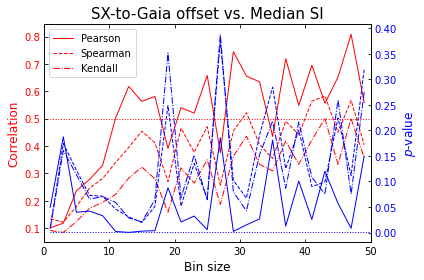

In [8]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. Median SI", fontsize=15)
fig.tight_layout()

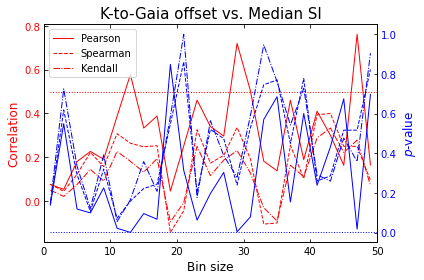

In [9]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. Median SI", fontsize=15)
fig.tight_layout()

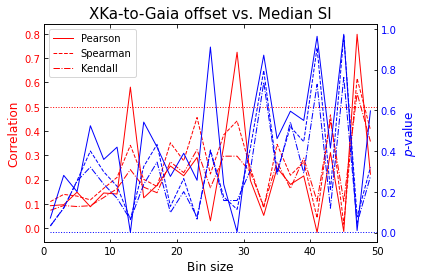

In [10]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. Median SI", fontsize=15)
fig.tight_layout()

### 2.1.2 $X$ vs Median SI

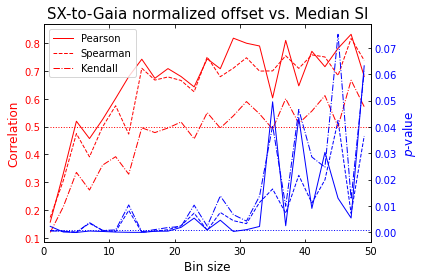

In [11]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. Median SI", fontsize=15)
fig.tight_layout()

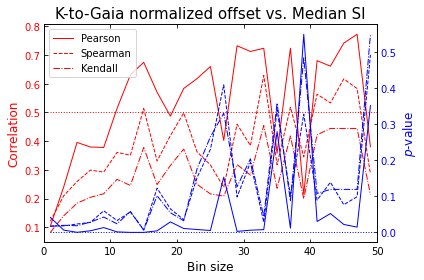

In [12]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. Median SI", fontsize=15)
fig.tight_layout()

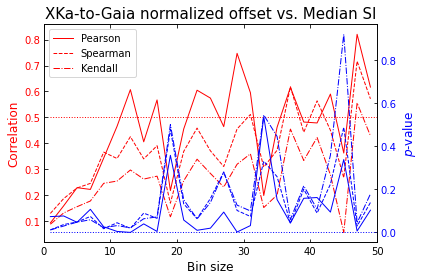

In [13]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. Median SI", fontsize=15)
fig.tight_layout()

## 2.2 Angular separation $\rho$  and normalized separation $X$vs. MI@2015

### 2.2.1 $\rho$ vs MI@2015

In [14]:
# Array of bin size
bin_array = np.arange(1, 21, 1)

# Sort the table
r2o_si15.sort("si_c2015")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_si15, "si_c2015", bin_array)

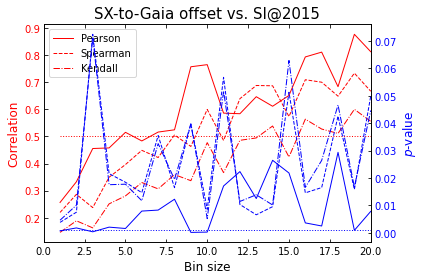

In [15]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 21, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 20])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 21, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. SI@2015", fontsize=15)
fig.tight_layout()

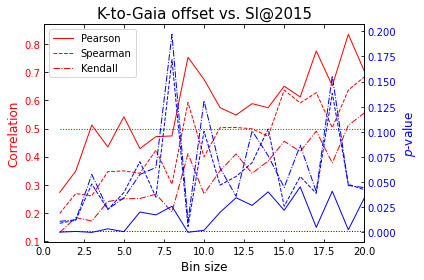

In [16]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 21, lw=1, color="r", ls=":")
# ax1.hlines(-0.5, 1, 21, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 20])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 21, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. SI@2015", fontsize=15)
fig.tight_layout()

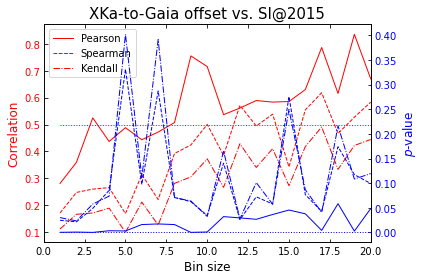

In [17]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 21, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 20])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 21, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. SI@2015", fontsize=15)
fig.tight_layout()

### 2.2.2 $X$ vs SI@2015

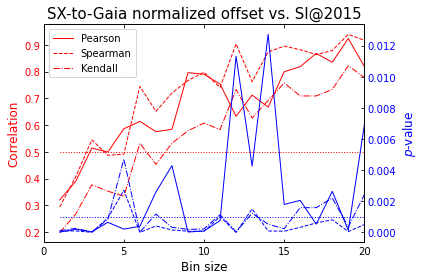

In [18]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 21, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 20])
ax1.set_xticks(np.arange(0, 21, 5))
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 21, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. SI@2015", fontsize=15)
fig.tight_layout()

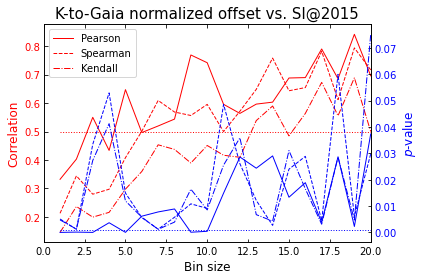

In [19]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 21, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 20])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 21, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. SI@2015", fontsize=15)
fig.tight_layout()

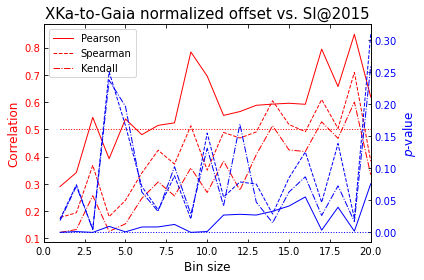

In [20]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 21, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 20])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 21, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. SI@2015", fontsize=15)
fig.tight_layout()